In [1]:
import scvelo as scv
import scanpy as sc
import cellrank as cr
import numpy as np
import pandas as pd
import anndata as ad
import scipy as sci
import matplotlib.pyplot as plt

import os

In [2]:
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(10, 10))


plt.rcParams['axes.grid'] = False
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


In [3]:
sc.settings.figdir = "fig5"
scv.settings.figdir = "fig5"



In [4]:


PATH = '/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas/adata_velo_integrated_new.h5ad.velo'
adata=sc.read_h5ad(PATH)
adata.shape

(45456, 18923)

In [5]:
0

0

In [6]:
# import scanpy as sc
# base_dir = '/nfs/team298/ls34/new_disease_atlas/model_scanvi5_EXTERNAL_OTHERTISSUES_4054/'
# #adata=sc.read_h5ad(base_dir + "adata_fbsonly_annotated.h5ad.final3.normalized")
# #adata=sc.read_h5ad(base_dir +   'adata_fbsonly_annotated.h5ad.final4_nonskinclustered.normalized2',)
# adata=sc.read_h5ad(base_dir +  'adata_fbsonly_annotated.h5ad.final4_nonskinclustered.normalized_n100')
# adata.shape


# def remove_markers(LIST):
#     try: 
#         LIST = {key: [gene for gene in genes if gene in adata.var_names] 
#                            for key, genes in LIST.items()}
#     except: 
#         LIST =[gene for gene in LIST if gene in adata.var_names]
#     return LIST



In [7]:
# adata_store.write( '/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas/adata_velo_integrated_new.h5ad')

# Filter

# start here

In [8]:
# #adata=adata[adata.obs["dataset_id"]=="Luc_psoriasis"]
# #adata=adata_store[adata_store.obs["dataset_id"]=="Keloid_Direder"]
# N_NEIGHBOR=10
# N_GENES=2000
# #N_PC=30
# #sc.pp.subsample(adata, 0.1)
# USE_SCVI=True

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

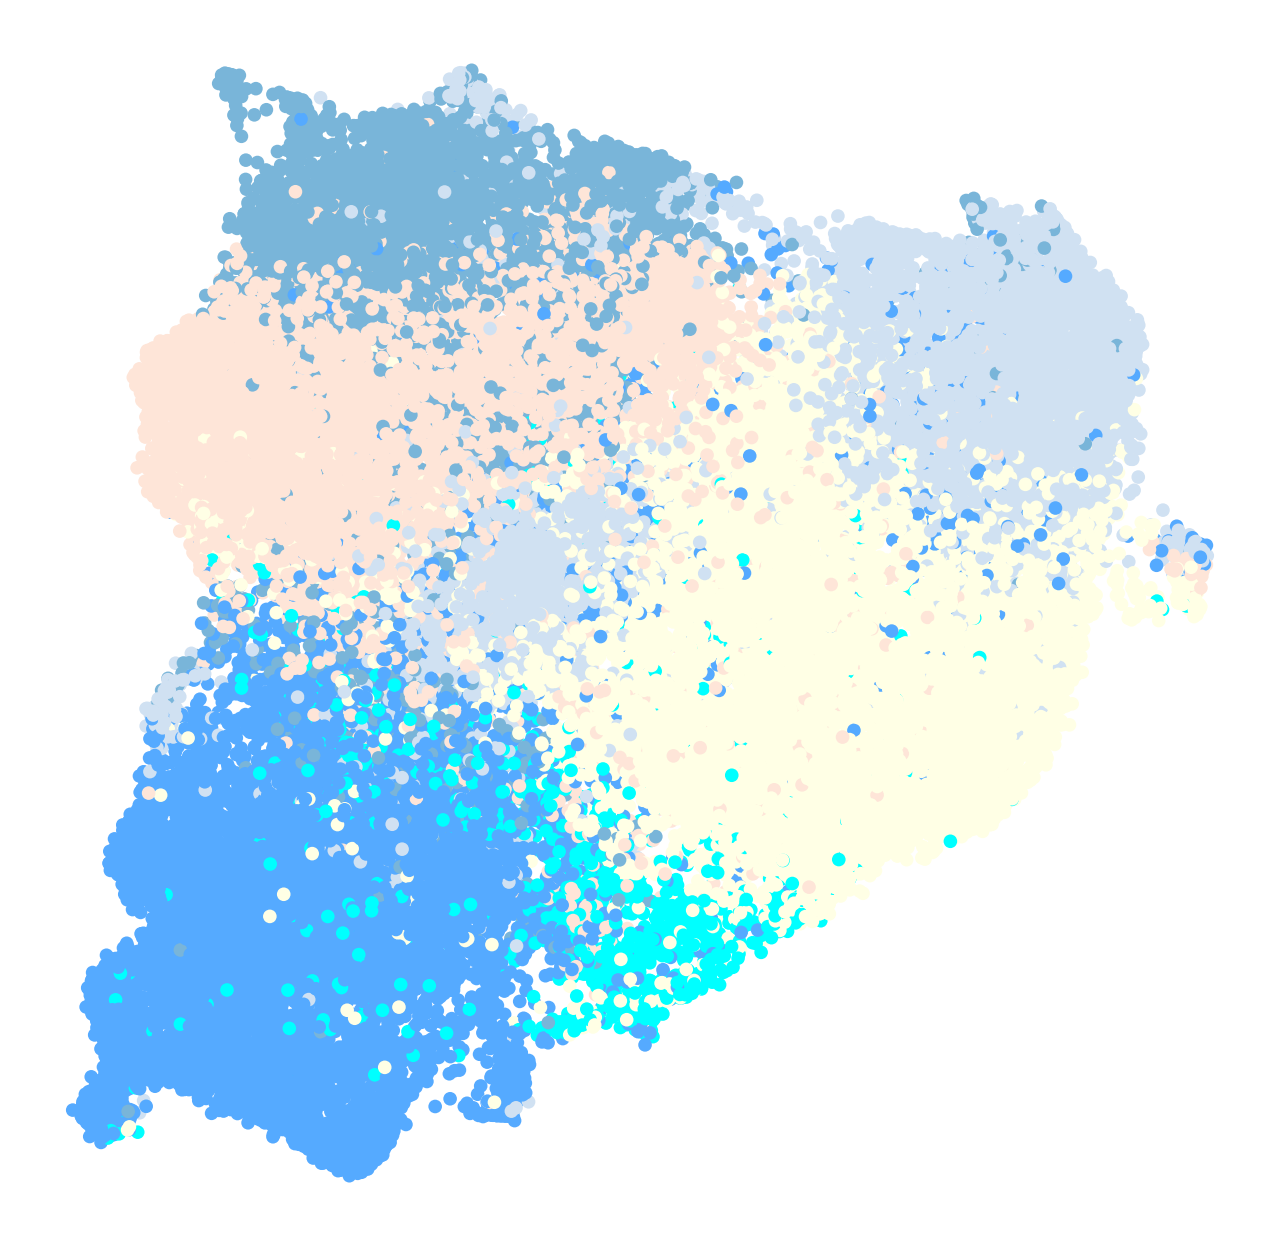

In [9]:
custom_colors = {'F1: Superficial': np.array([1.        , 1.        , 0.89803922, 1.        ]),
 'F1: EA-Regenerative': np.array([0.99607843, 0.80915033, 0.39607843, 1.        ]),
 'F2: Universal': np.array([0.81411765, 0.88392157, 0.94980392, 1.        ]),
 'F2/3: Perivascular': np.array([0.47294118, 0.71163399, 0.85071895, 1.        ]),
 'F3: FRC-like': np.array([0.99692426, 0.89619377, 0.84890427, 1.        ]),
 'F4: DS_DPEP1+': np.array([0.82745098, 0.93254902, 0.80313725, 1.        ]),
 'F4: TNN+COCH+': np.array([0.50196078, 0.79058824, 0.50143791, 1.        ]),
 'F4: DP_HHIP+': np.array([0.15294118, 0.56183007, 0.28313725, 1.        ]),
 'F5: RAMP1+':np.array([0.6177624 , 0.60213764, 0.78345252, 1.        ]),
 'F5: NGFR+': np.array([0.47320261, 0.43267974, 0.69934641, 1.        ]),
 'F6: Inflammatory myofibroblast': np.array([0., 1., 1., 1.]),
 'F7: Myofibroblast': np.array([0.33333333, 0.66666667, 1.        , 1.        ]),
 'F7: Fascia-like myofibroblast': np.array([0.95686275, 0.55686275, 0.74509804, 1.0]),
 'F_Fascia': np.array([0, 0, 0, 0.3])
                               }

adata.obs["test12"]=adata.obs["test12"].astype('category')
try:
    adata.uns["test12_colors"] = [custom_colors[cat] for cat in adata.obs["test12"].cat.categories]
except KeyError as e:
    print(f"Error: Missing color for category {e}")
sc.pl.umap(
    adata,
    color='test12',
    show=False,
    frameon=False,
    legend_loc=None, # "on data",
    legend_fontsize=5,
    s=150,
    title='',
    legend_fontoutline=2
)

 

# Pseudotime

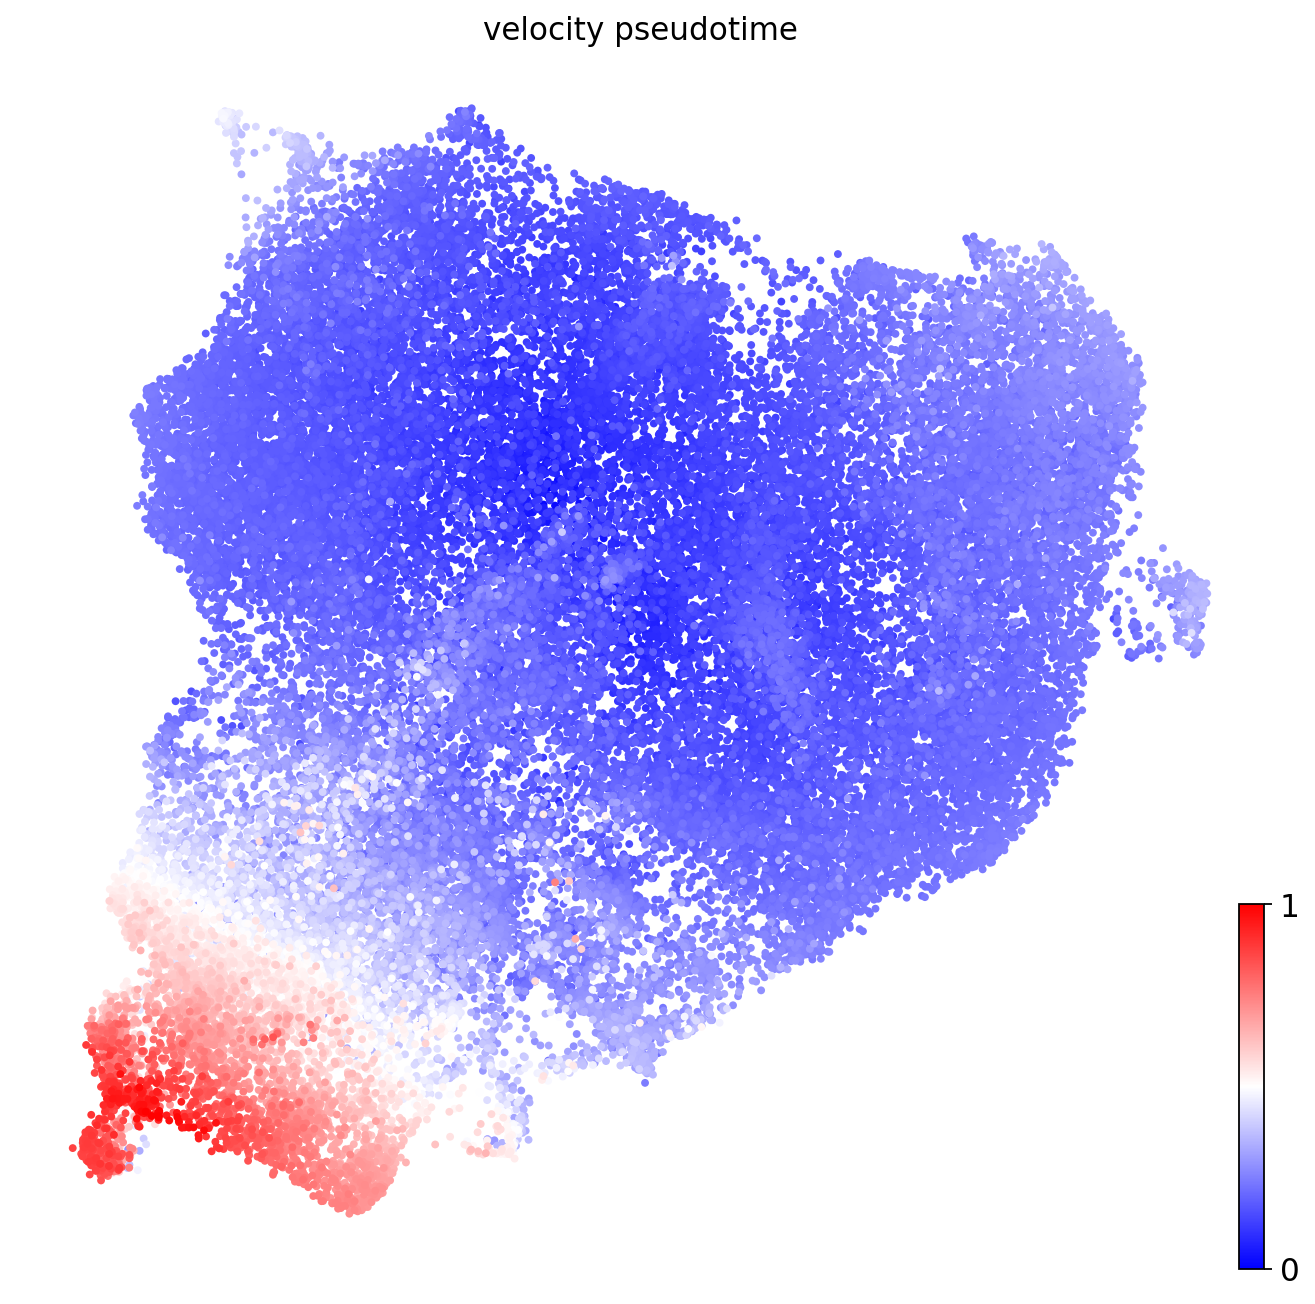

<Figure size 800x800 with 0 Axes>

In [10]:
scv.tl.velocity_pseudotime(adata)
                              # save="fig5a_pseudotime.pdf")
#plt.savefig("velocity_pseudotime_umap.pdf", dpi=300, bbox_inches="tight", format="pdf")
scv.pl.scatter(adata, color="velocity_pseudotime", basis="umap",
               s=50,
               cmap="bwr")

plt.savefig("fig5/fig5a_velocity_pseudotime_umapNEW.pdf", dpi=300, bbox_inches="tight", format="pdf")
plt.show()

In [11]:
import gc
gc.collect()

5616

# PAGA plot

In [12]:
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']
scv.tl.paga(adata, groups='test12')

running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:20) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


saving figure to file fig5/scvelo_fig5b_paga_nolabels_V2_NEW.pdf


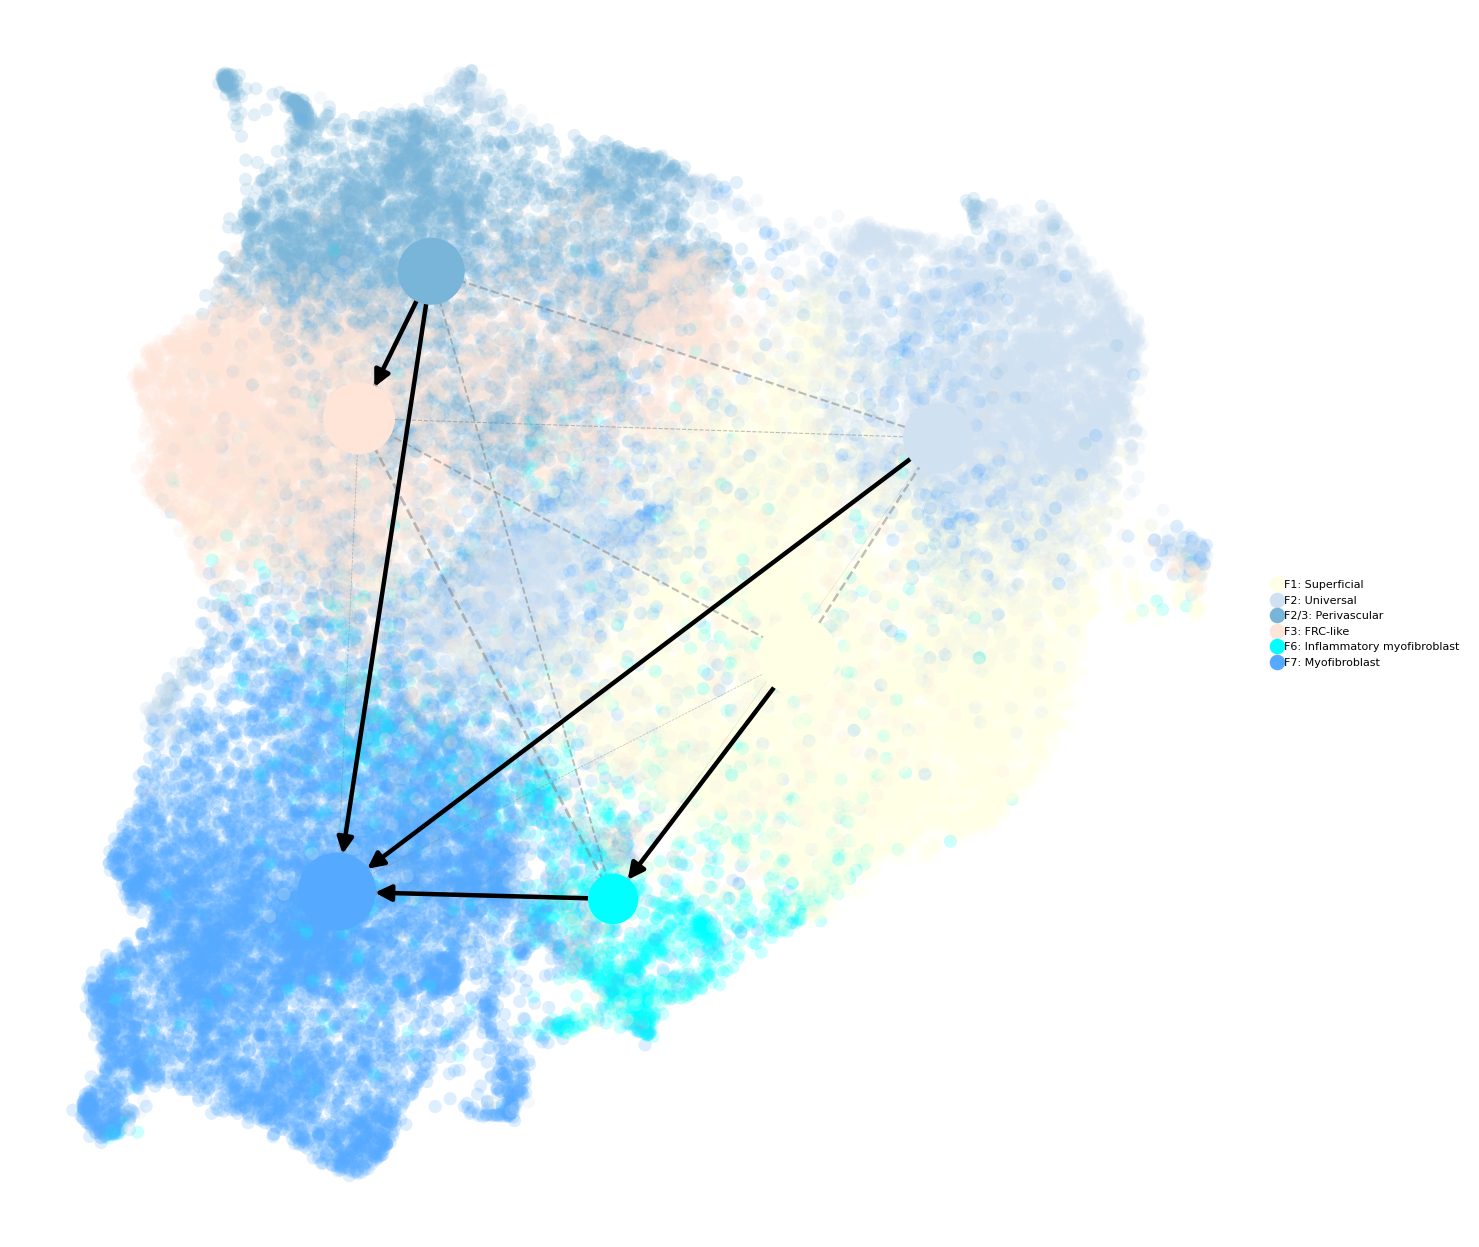

In [13]:

scv.pl.paga(adata, basis='umap', size=140, alpha=.2,
            min_edge_width=2, node_size_scale=6,
               edgecolor='black',   
            linewidth=5  ,     
           normalize_to_color=True,
          #  edge_width_scale=5
           # legend_loc="on data",
            title="",
            legend_fontoutline=2,
            legend_fontsize=5,
            fontoutline=2,
            fontsize=8,
            
           save="fig5b_paga_nolabels_V2_NEW.pdf"
           )

In [14]:


# PATH = '/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas/adata_velo_integrated_new.h5ad.velo_FIXEDPAGA'
# adata.write(PATH)


In [15]:
STOP

NameError: name 'STOP' is not defined

# Velocity

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, 
    basis='umap', 
    color='test12', 
    title='', 
    density=4  ,
    s=10,
    #save="SUPP_fig5c_velocity.pdf",
    legend_loc='right'#None
    
    
)

 

# RNA velocity kernel

In [ ]:
vk = cr.kernels.VelocityKernel(adata)
vk.compute_transition_matrix()

vk.plot_projection(color=['test12'], s=50, title='',
                   linewidth=2,
                 #  save="fig5c_velocityembedding_nolabels.pdf",
                   legend_loc="right", legend_fontoutline=2,
                   legend_fontsize=20)
plt.show()



# Combined kernel

In [ ]:
ck = cr.kernels.ConnectivityKernel(adata)
ck.compute_transition_matrix()

combined_kernel = 0.5 * vk + 0.5 * ck

combined_kernel.plot_projection(color=['test12'], s=500, title='',
                   linewidth=1,
                 save="fig5c_velocityembedding_nolabels_NEW.pdf",
                   legend_loc="right", legend_fontoutline=2,
                   legend_fontsize=20)
plt.show()

In [ ]:
stop

In [ ]:
# sc.pp.highly_variable_genes(adata, 
#                             #min_mean=0.0125, 
#                           #  max_mean=3, 
#                           #  min_disp=0.5,
#                             batch_key="sample_id", 
#                             n_top_genes=N_GENES
#                             )


In [ ]:
scv.pl.proportions(adata, groupby='test12')

In [ ]:
if USE_SCVI:
    print("use scvi")
    scv.pp.neighbors(adata, 
                     n_neighbors=N_NEIGHBOR, 
                     use_rep = 'X_scvi'
                    )  #n_pcs = 10) #random_state=0)# use_rep = 'X_scvi')
    scv.pp.moments(adata,# n_pcs=None,
                   n_neighbors=N_NEIGHBOR,
                   use_rep='X_scvi'
                  )    # neighbor_key="n")
    #scv.pp.moments(adata, n_pcs=N_PC, n_neighbors=N_NEIGHBOR)
else:
    
    scv.pp.neighbors(adata, 
                     n_neighbors=N_NEIGHBOR, 
                     n_pcs = 30
                     #use_rep = 'X_scvi'
                    )  #n_pcs = 10) #random_state=0)# use_rep = 'X_scvi')
    scv.pp.moments(adata, n_pcs=30, n_neighbors=N_NEIGHBOR)

In [ ]:
import gc
gc.collect()


In [ ]:
0

In [ ]:
adata.shape

In [ ]:
scv.tl.velocity(adata, mode='stochastic', groupby="test12")


In [ ]:
scv.tl.velocity_graph(adata)


In [ ]:
scv.pl.velocity_embedding_stream(
    adata, 
    basis='umap', 
    color='test12', 
    title='', 
    density=4  ,
    s=10,
    #save="SUPP_fig5c_velocity.pdf",
    legend_loc='right'#None
    
    
)

 

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, 
    basis='umap', 
    color='test12', 
    title='', 
    density=4  ,
    #save="SUPP_fig5c_velocity.pdf",
    legend_loc=None
    
)

 

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, 
    basis='umap', 
    color='test12', 
    title='', 
    density=2  ,
   # save="SUPP_fig5c_velocity.pdf",
    legend_loc="right"
    
)

 

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, 
    basis='umap', 
    color='test12', 
    title='', 
    density=2  ,
   # save="SUPP_fig5c_velocity.pdf",
    legend_loc=None
    
)

 


# VELOCITY KERNEL

In [ ]:
vk = cr.kernels.VelocityKernel(adata)
vk.compute_transition_matrix()


In [ ]:
# vk.plot_projection(color=['test13'], s=50, title='', save="_velocityembedding.pdf")
# plt.show()

In [ ]:
9

In [ ]:
# #plt.rcParams['axes.grid'] = False
# vk.plot_projection(color=['test2'], s=50, title='', save="_velocityembedding.pdf")
# plt.show()

In [ ]:

# vk.plot_projection(color=['test12'], s=50, title='',
#                    linewidth=12,
#                   # save="fig5c_velocityembedding_nolabels.pdf",
#                    legend_loc="right")
# plt.show()

In [ ]:

vk.plot_projection(color=['test12'], s=50, title='',
                   linewidth=2,
                 #  save="fig5c_velocityembedding_nolabels.pdf",
                   legend_loc="right", legend_fontoutline=2,
                   legend_fontsize=20)
plt.show()



In [ ]:

vk.plot_projection(color=['test12'], s=50, title='',
                   linewidth=2,
                                density=4,
                 #  save="fig5c_velocityembedding_nolabels.pdf",
                   legend_loc="right", legend_fontoutline=2,
                   legend_fontsize=20)
plt.show()

In [ ]:

# vk.plot_projection(color=['test12'], s=50, title='',
#                    linewidth=2,
#                  #  save="fig5c_velocityembedding_nolabels.pdf",
#                    legend_loc=None, legend_fontoutline=2,
#                    legend_fontsize=20)
# plt.show()

In [ ]:

# vk.plot_projection(color=['test12'], s=50, title='',
#                    linewidth=3,
#                 #   save="fig5c_velocityembedding_nolabels2.pdf",
#                    legend_loc="on data",
#                   legend_fontoutline=2, legend_fontsize=20
#                   )
# plt.show()

In [ ]:

# vk.plot_projection(color=['test12'], s=50, title='',
#                    linewidth=3,
#                    #save="fig5c_velocityembedding_nolabels2.pdf", 
#                    legend_loc="right")
# plt.show()

In [ ]:
# vk.plot_projection(color=['test12'], s=50, title='',
#                    #save="fig5c_velocityembedding_nolabels.pdf",
#                    legend_loc="right")
# plt.show()

In [ ]:
# vk.plot_projection(color=['test2'], s=50, title='', save="_velocityembedding_nolabels.pdf", legend_loc="right",
#                   density=1, linewidth=2)
# plt.show()

In [ ]:
# vk.plot_projection(color=['test2'], s=50, title='', #save="_velocityembedding_nolabels.pdf",
                   
#                    legend_loc="right",
#                   density=1.2, linewidth=3)
# plt.show()

In [ ]:
ax = vk.plot_projection(color=['test12'], stream=False)


In [ ]:
# sc.pp.neighbors(adata,  n_neighbors=30, use_rep="X_scvi")

In [ ]:
# scv.pl.velocity_graph(adata, threshold=0.1, color='test2')


In [ ]:
scv.tl.velocity_pseudotime(adata)
                              # save="fig5a_pseudotime.pdf")
#plt.savefig("velocity_pseudotime_umap.pdf", dpi=300, bbox_inches="tight", format="pdf")


In [ ]:
# adata.uns['neighbors']['distances'] = adata.obsp['distances']
# adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']
# scv.tl.paga(adata, groups='test12')

In [ ]:
scv.pl.scatter(adata, color="velocity_pseudotime", basis="umap",
               s=50,
               cmap="bwr")

#plt.savefig("fig5/fig5a_velocity_pseudotime_umap.pdf", dpi=300, bbox_inches="tight", format="pdf")
plt.show()

In [ ]:
# import sys
# !{sys.executable} -m pip install scipy==1.11.4

In [ ]:
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']
scv.tl.paga(adata, groups='test12')

In [ ]:

scv.pl.paga(adata, basis='umap', size=140, alpha=.2,
            min_edge_width=2, node_size_scale=6,
               edgecolor='black',   
            linewidth=5  ,     
           normalize_to_color=True,
          #  edge_width_scale=5
           # legend_loc="on data",
            title="",
            legend_fontoutline=2,
            legend_fontsize=5,
            fontoutline=2,
            fontsize=8,
            
          # save="fig5b_paga_nolabels_V2.pdf"
           )

In [ ]:


0

In [ ]:
ck = cr.kernels.ConnectivityKernel(adata)
ck.compute_transition_matrix()

combined_kernel = 0.8 * vk + 0.2 * ck


In [ ]:

combined_kernel.plot_projection(color=['test12'], s=50, title='',
                   linewidth=2,
                                density=4,
                 #  save="fig5c_velocityembedding_nolabels.pdf",
                   legend_loc="right", legend_fontoutline=2,
                   legend_fontsize=20)
plt.show()

In [ ]:

ck.plot_projection(color=['test12'], s=50, title='',
                   linewidth=2,
                 #  save="fig5c_velocityembedding_nolabels.pdf",
                   legend_loc="right", legend_fontoutline=2,
                   legend_fontsize=20)
plt.show()

# Re-do with reprocessing

In [ ]:
sc.tl.umap(adata,
           init_pos='paga',
           min_dist=0.3)  # neighbor_key="neighbor_30",  


In [ ]:
scv.pl.velocity_embedding_stream(
    adata, 
    basis='umap', 
    color='test12', 
    title='', 
    density=4  ,
    #save="SUPP_fig5c_velocity.pdf",
    legend_loc=None
    
)

 

In [ ]:
# adata.uns['neighbors']['distances'] = adata.obsp['distances']
# adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']
# scv.tl.paga(adata, groups='test12')


In [ ]:
scv.pl.paga(adata, basis='umap', size=140, alpha=.2,
            min_edge_width=2, node_size_scale=6,
               edgecolor='black',   
            linewidth=5  ,     
           normalize_to_color=True,
          #  edge_width_scale=5
           # legend_loc="on data",
            title="",
            legend_fontoutline=2,
            legend_fontsize=5,
            fontoutline=2,
            fontsize=8,
            
          # save="fig5b_paga_nolabels_V2.pdf"
           )

In [ ]:

vk.plot_projection(color=['test12'], s=50, title='',
                   linewidth=2,
                 #  save="fig5c_velocityembedding_nolabels.pdf",
                   legend_loc="right", legend_fontoutline=2,
                   legend_fontsize=20)
plt.show()

In [ ]:
# adata.uns['neighbors']['distances'] = adata.obsp['distances']
# adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']
# scv.tl.paga(adata, groups='test12')

In [ ]:
# scv.pl.paga(adata, basis='umap', size=140, alpha=.2,
#             min_edge_width=2, node_size_scale=6,
#                edgecolor='black',   
#             linewidth=5  ,     
#            normalize_to_color=True,
#           #  edge_width_scale=5
#            # legend_loc="on data",
#             title="",
#             legend_fontoutline=2,
#             legend_fontsize=5,
#             fontoutline=2,
#             fontsize=8,
            
#           # save="fig5b_paga_nolabels_V2.pdf"
#            )

In [ ]:
# scv.pl.velocity_embedding_stream(
#     adata, 
#     basis='umap', 
#     color='test12', 
#     title='', 
#     density=4  ,
#     #save="SUPP_fig5c_velocity.pdf",
#     legend_loc=None
    
# )

 

In [ ]:
scv.tl.velocity(adata, mode='stochastic')
scv.tl.velocity_graph(adata)

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, 
    basis='umap', 
    color='test12', 
    title='', 
    density=4  ,
    #save="SUPP_fig5c_velocity.pdf",
    legend_loc=None
    
)

 

In [ ]:

vk.plot_projection(color=['test12'], s=50, title='',
                   linewidth=2,
                 #  save="fig5c_velocityembedding_nolabels.pdf",
                   legend_loc="right", legend_fontoutline=2,
                   legend_fontsize=20)
plt.show()

In [ ]:
scv.tl.velocity_pseudotime(adata)
                              # save="fig5a_pseudotime.pdf")
#plt.savefig("velocity_pseudotime_umap.pdf", dpi=300, bbox_inches="tight", format="pdf")
scv.pl.scatter(adata, color="velocity_pseudotime", basis="umap",
               s=50,
               cmap="bwr")

#plt.savefig("fig5/fig5a_velocity_pseudotime_umap.pdf", dpi=300, bbox_inches="tight", format="pdf")
plt.show()

In [ ]:
scv.pl.paga(adata, basis='umap', size=140, alpha=.2,
            min_edge_width=2, node_size_scale=6,
               edgecolor='black',   
            linewidth=5  ,     
           normalize_to_color=True,
          #  edge_width_scale=5
           # legend_loc="on data",
            title="",
            legend_fontoutline=2,
            legend_fontsize=5,
            fontoutline=2,
            fontsize=8,
            
          # save="fig5b_paga_nolabels_V2.pdf"
           )

In [ ]:
adata

In [ ]:
sc.tl.draw_graph(adata, init_pos='paga')
sc.pl.draw_graph(adata, color='test12', legend_loc='on data', legend_fontsize = 'xx-small')

In [ ]:

scv.pl.velocity_embedding_stream(
    adata, 
    basis='umap', 
    color='test12', 
    title='', 
    density=4  ,
    #save="SUPP_fig5c_velocity.pdf",
    legend_loc=None
    
)

 

In [ ]:
# adata.uns['neighbors']['distances'] = adata.obsp['distances']
# adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']
# scv.tl.paga(adata, groups='test12',         
#             #use_rna_velocity=True,             model='v1.2',
# )

In [ ]:
# scv.pl.paga(adata, basis='umap', size=140, alpha=.2,
#             min_edge_width=2, node_size_scale=6,
#                edgecolor='black',   
#             linewidth=5  ,     
#            normalize_to_color=True,
#           #  edge_width_scale=5
#            # legend_loc="on data",
#             title="",
#             legend_fontoutline=2,
#             legend_fontsize=5,
#             fontoutline=2,
#             fontsize=8,
            
#           # save="fig5b_paga_nolabels_V2.pdf"
#            )

In [ ]:
sc.tl.diffmap(adata , n_comps=50, #neighbors_key='neighbors', 
              random_state=0, copy=False)


In [ ]:
sc.tl.dpt(adata , n_dcs=10, n_branchings=1, min_group_size=0.01, allow_kendall_tau_shift=True, neighbors_key='neighbors', copy=False)


In [ ]:
sc.tl.draw_graph(adata)#, #init_pos='paga')

In [ ]:
# scv.pl.paga(adata, basis='umap', size=140, alpha=.2,
#             min_edge_width=2, node_size_scale=6,
#                edgecolor='black',   
#             linewidth=5  ,     
#            normalize_to_color=True,
#           #  edge_width_scale=5
#            # legend_loc="on data",
#             title="",
#             legend_fontoutline=2,
#             legend_fontsize=5,
#             fontoutline=2,
#             fontsize=8,
            
#           # save="fig5b_paga_nolabels_V2.pdf"
#            )

In [ ]:
import gc
gc.collect()

In [ ]:
scv.tl.velocity(adata, mode='stochastic')

scv.tl.velocity_graph(adata)


In [ ]:
scv.pl.paga(adata, basis='umap', size=140, alpha=.2,
            min_edge_width=2, node_size_scale=6,
               edgecolor='black',   
            linewidth=5  ,     
           normalize_to_color=True,
          #  edge_width_scale=5
           # legend_loc="on data",
            title="",
            legend_fontoutline=2,
            legend_fontsize=5,
            fontoutline=2,
            fontsize=8,
            
          # save="fig5b_paga_nolabels_V2.pdf"
           )

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, 
    basis='umap', 
    color='test12', 
    title='', 
    density=4  ,
    #save="SUPP_fig5c_velocity.pdf",
    legend_loc=None
    
)

 
    

In [ ]:
vk = cr.kernels.VelocityKernel(adata)
vk.compute_transition_matrix()

In [ ]:


vk.plot_projection(color=['test12'], s=50, title='',
                   linewidth=2,
                 #  save="fig5c_velocityembedding_nolabels.pdf",
                   legend_loc="right", legend_fontoutline=2,
                   legend_fontsize=20)
plt.show()

In [ ]:
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']
scv.tl.paga(adata, groups='test12')

In [ ]:
scv.pl.paga(adata, basis='umap', size=140, alpha=.2,
            min_edge_width=2, node_size_scale=6,
               edgecolor='black',   
            linewidth=5  ,     
           normalize_to_color=True,
          #  edge_width_scale=5
           # legend_loc="on data",
            title="",
            legend_fontoutline=2,
            legend_fontsize=5,
            fontoutline=2,
            fontsize=8,
            threshold=0.2
            
          # save="fig5b_paga_nolabels_V2.pdf"
           )

In [ ]:
vk = cr.kernels.VelocityKernel(adata)
vk.compute_transition_matrix()


In [ ]:
vk.plot_projection(color=['test12'], s=150, title='',
                   linewidth=1,
                 #  save="fig5c_velocityembedding_nolabels.pdf",
                   legend_loc="right", legend_fontoutline=2,
                   legend_fontsize=20)
plt.show()

In [ ]:



ck = cr.kernels.ConnectivityKernel(adata)
ck.compute_transition_matrix()

combined_kernel = 0.5 * vk + 0.5 * ck


In [ ]:

combined_kernel.plot_projection(color=['test12'], s=500, title='',
                   linewidth=1,
                 #  save="fig5c_velocityembedding_nolabels.pdf",
                   legend_loc="right", legend_fontoutline=2,
                   legend_fontsize=20)
plt.show()

In [ ]:
scv.tl.velocity_pseudotime(adata)
                              # save="fig5a_pseudotime.pdf")
#plt.savefig("velocity_pseudotime_umap.pdf", dpi=300, bbox_inches="tight", format="pdf")
scv.pl.scatter(adata, color="velocity_pseudotime", basis="umap",
               s=50,
               cmap="bwr")

#plt.savefig("fig5/fig5a_velocity_pseudotime_umap.pdf", dpi=300, bbox_inches="tight", format="pdf")
plt.show()

In [ ]:
scv.pl.paga(adata, basis='umap', size=140, alpha=.2,
            min_edge_width=2, node_size_scale=6,
               edgecolor='black',   
            linewidth=5  ,     
           normalize_to_color=True,
          #  edge_width_scale=5
           # legend_loc="on data",
            title="",
            legend_fontoutline=2,
            legend_fontsize=5,
            fontoutline=2,
            fontsize=8,
            threshold=0.2
            
          # save="fig5b_paga_nolabels_V2.pdf"
           )